# Assignment 3: Clustering - Group 4

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>8</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>8</font> |

## Question 1

**Import Libraries**

In [218]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

%matplotlib inline

**Load dataset**

In [219]:
df = pd.read_csv('data_assignment3.csv')

df.head()

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


**Plot the dataset**

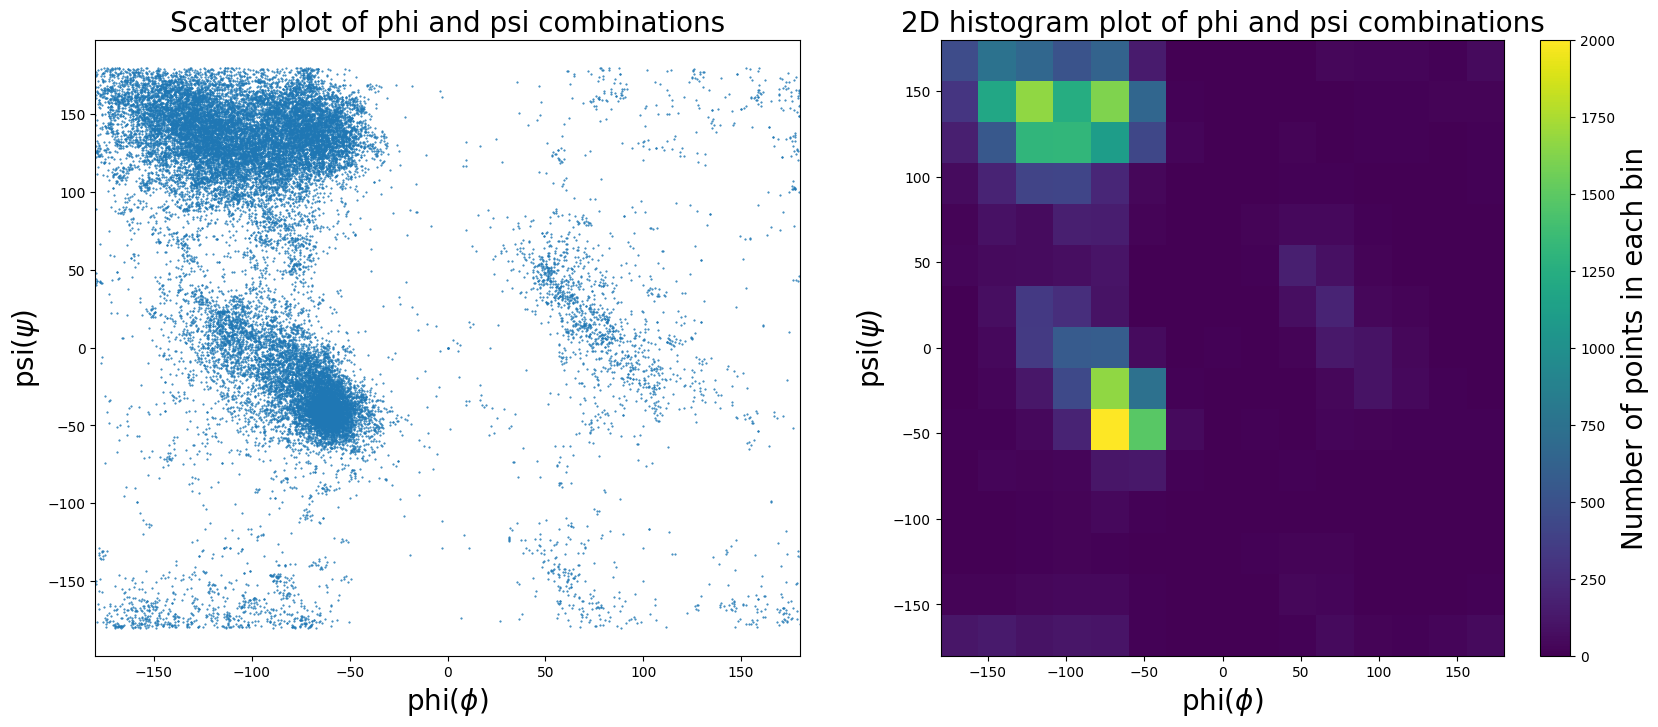

In [220]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

ax[0].scatter(df['phi'], df['psi'], marker='.', s=1)
ax[0].set_xlabel('phi($\phi$)',fontsize=20)
ax[0].set_ylabel('psi($\psi$)',fontsize=20)
ax[0].set_xlim(-180,180)
ax[0].set_xlim(-180,180)
ax[0].set_title('Scatter plot of phi and psi combinations', fontsize=20)

h = ax[1].hist2d(df['phi'], df['psi'], bins=15,cmap='viridis')
ax[1].set_xlabel('phi($\phi$)',fontsize=20)
ax[1].set_ylabel('psi($\psi$)',fontsize=20)
ax[1].set_xlim(-180,180)
ax[1].set_xlim(-180,180)
ax[1].set_title('2D histogram plot of phi and psi combinations', fontsize=20)

cbar = fig.colorbar(h[3], ax=ax[1])
cbar.set_label('Number of points in each bin',fontsize=20)

**Transform the data**

Since the edges of the Ramachandran plot wrap around which means that phi and psi angles close to the edge of the plot may actually be close to angles on the opposite side of the plot. To address this issue, a common approach is to use circular statistics, which take into account the circular nature of the data.

In [221]:
# Convert phi and psi data into circular variables (in radians)
phi= np.deg2rad(df['phi'])
psi = np.deg2rad(df['psi'])
r = np.sqrt(phi**2 + psi**2)

df['x_phi'] = r*np.cos(phi)
df['y_phi'] = r*np.sin(phi)
df['x_psi'] = r*np.cos(psi)
df['y_psi'] = r*np.sin(psi)

df

,residue name,position,chain,phi,psi,x_phi,y_phi,x_psi,y_psi
0,LYS,10,A,-149.312855,142.657714,-3.099531,-1.839426,-2.865468,2.186246
1,PRO,11,A,-44.283210,136.002076,1.787126,-1.742961,-1.795782,1.734041
2,LYS,12,A,-119.972621,-168.705263,-1.805045,-3.129882,-3.543104,-0.707644
3,LEU,13,A,-135.317212,137.143523,-2.390849,-2.364521,-2.464992,2.287125
4,LEU,14,A,-104.851467,95.928520,-0.635746,-2.397481,-0.256189,2.467074
...,...,...,...,...,...,...,...,...,...
29364,GLY,374,B,-147.749557,155.223562,-3.163203,-1.995867,-3.395943,1.567452
29365,GLN,375,B,-117.428541,133.019506,-1.426538,-2.748719,-2.112816,2.264172
29366,ILE,376,B,-113.586448,112.091970,-1.114463,-2.552550,-1.047511,2.580747
29367,ASN,377,B,-100.668779,-12.102821,-0.327618,-1.739063,1.730320,-0.371037


## Question 2
**Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.**

In [222]:
# kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['phi','psi']])
# kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['phi','psi']])

print(kmeans.cluster_centers_)

[[-105.18210709  134.59750562]
 [ -78.08276981  -36.94442146]
 [  87.55008471    8.80213455]]


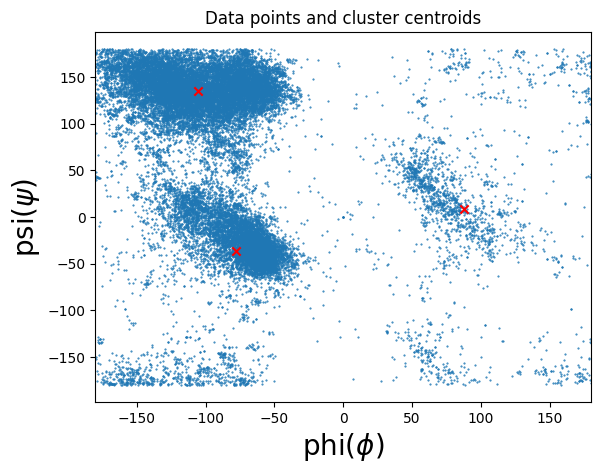

In [223]:
# Plotting the cluster centers and the data points
plt.scatter(df['phi'], df['psi'], marker='.', s=1)
plt.xlabel('phi($\phi$)',fontsize=20)
plt.ylabel('psi($\psi$)',fontsize=20)
plt.xlim(-180,180)
plt.xlim(-180,180)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

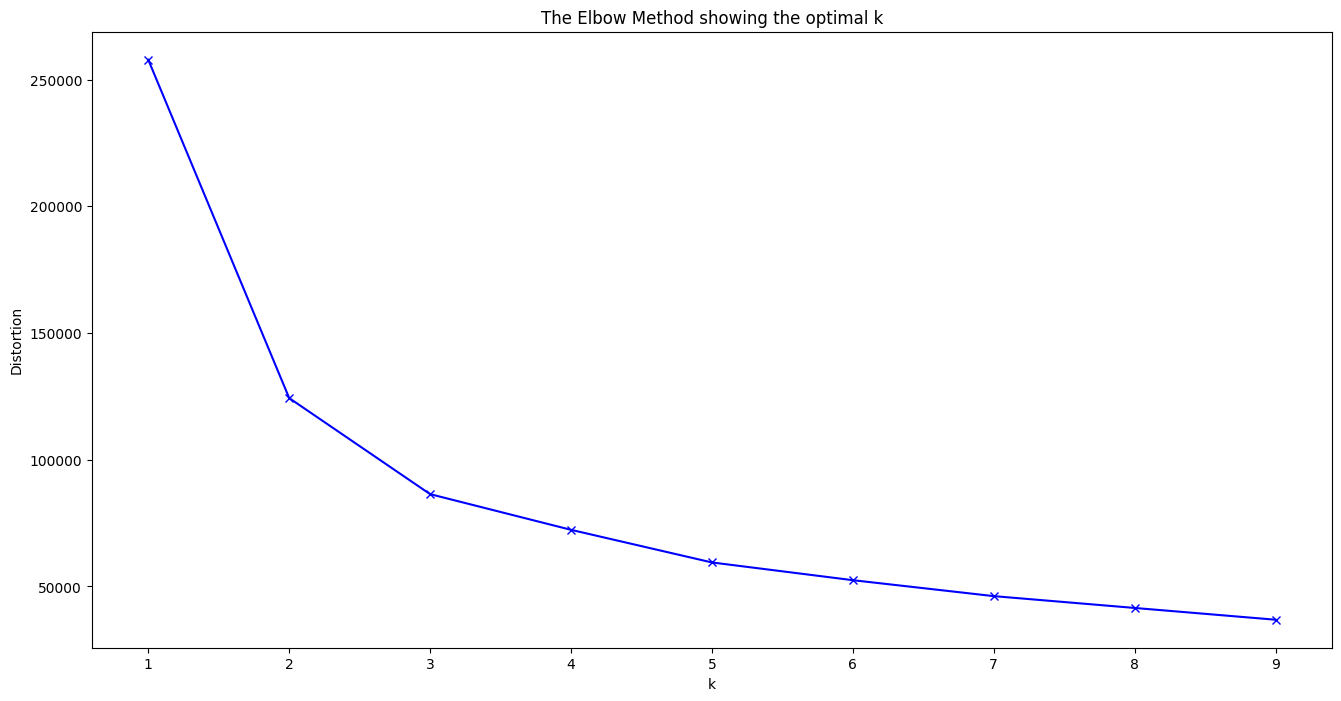

In [224]:
diameter = []
K = range(1,10)
for k in K:
    # kmeanModel = KMeans(n_clusters=k)
    kmeanModel = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeanModel.fit(df[['x_phi','y_phi','x_psi','y_psi']])
    diameter.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, diameter, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K_Means')

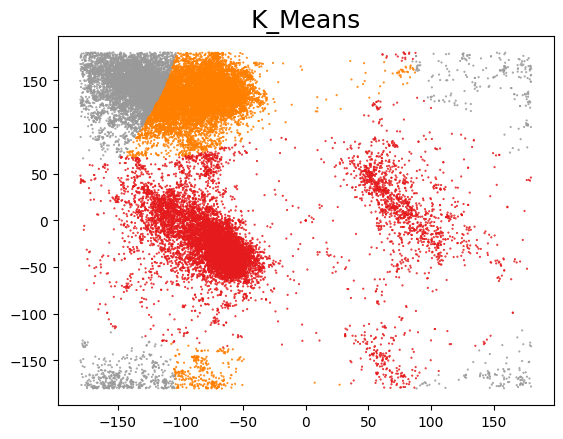

In [225]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df[['x_phi','y_phi','x_psi','y_psi']])

df['k_means']=kmeanModel.predict(df[['x_phi','y_phi','x_psi','y_psi']])

plt.scatter(df['phi'], df['psi'], c=df['k_means'], cmap=plt.cm.Set1, marker='.', s=1)
plt.title('K_Means', fontsize=18)

## Question 3
**Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.**

In [244]:
# Compute DBSCAN
X = df[['x_phi','y_phi','x_psi','y_psi']]
df_points = df[['phi','psi']]

db = DBSCAN(eps=0.3, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


DBSCAN(eps=0.3, min_samples=100)
Estimated number of clusters: 4
Estimated number of noise points: 5870


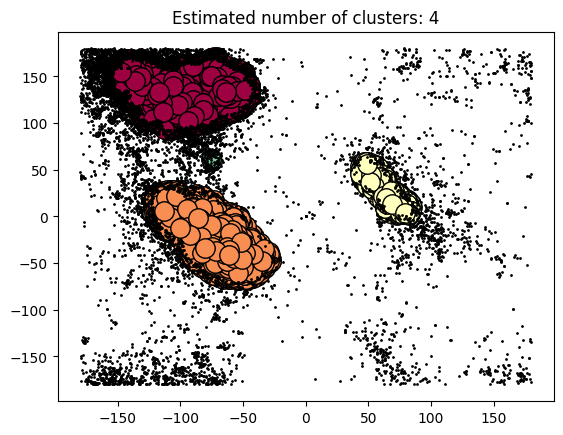

In [245]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # xy = X[class_member_mask & core_samples_mask]
    xy = df_points[class_member_mask & core_samples_mask]
    # print(xy)
    # plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    plt.plot(xy['phi'], xy['psi'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)


    # xy = X[class_member_mask & ~core_samples_mask]
    xy = df_points[class_member_mask & ~core_samples_mask]
    # plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
    plt.plot(xy['phi'], xy['psi'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=1)


plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
class_member_mask

array([ True,  True,  True, ...,  True,  True, False])